In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image
import tifffile as tiff
import matplotlib.animation as animation
import seaborn as sns
from IPython import display

mpl.rcParams.update({'font.size':17}) #make font bigger to match figsize

In [2]:
DF=pd.read_csv(r'O:\Desktop\WORLDMAP\IRELAND_REG.csv', index_col=0)
df=pd.read_csv(r'O:\Desktop\WORLDMAP\IRELANDMAP.csv', index_col=0)
DF['4x']=4*DF['x']
DF['-4y']=4*DF['-y']
DF.head()

,x,-y,T,I,D,S,Q,R,E,REG,4x,-4y
0,72,7,2649.716228,0,0,2649.716228,0,0,0,W,288,28
1,82,8,4843.815504,0,0,4843.815504,0,0,0,N,328,32
2,83,8,2591.291308,0,0,2591.291308,0,0,0,N,332,32
3,89,8,4779.459911,0,0,4779.459911,0,0,0,N,356,32
4,68,9,5141.550040,0,0,5141.550040,0,0,0,W,272,36


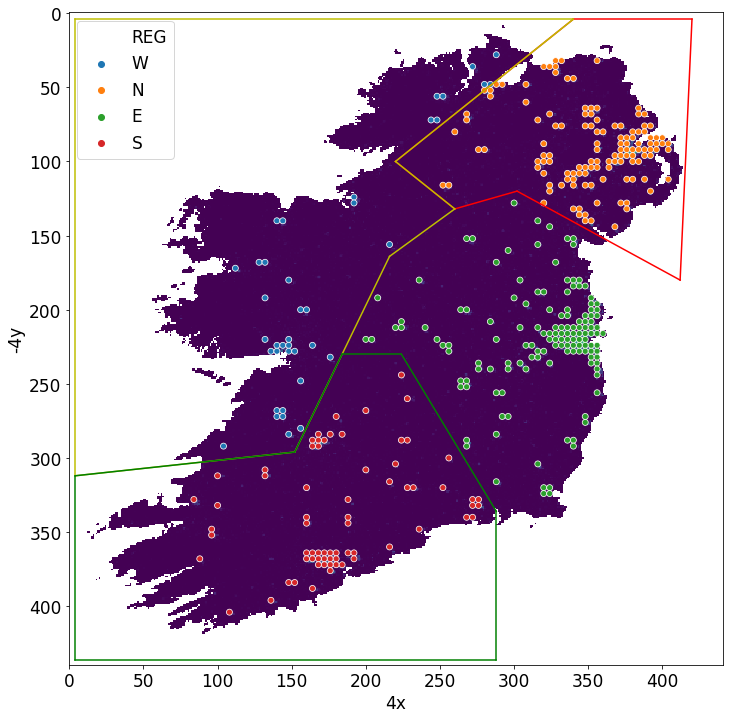

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow((df**0.5)**2)

x=np.linspace(55*4, 85*4, 100)
ax.plot(x, (1-25)/(85-55)*x+25*4-(1-25)/(85-55)*55*4, 'r')
x=np.linspace(55*4, 65*4, 100)
ax.plot(x, (33-25)/(65-55)*x+25*4-(33-25)/(65-55)*55*4, 'r')
x=np.linspace(65*4, 75.5*4, 100)
ax.plot(x, (30-33)/(75.5-65)*x+33*4-(30-33)/(75.5-65)*65*4, 'r')
x=np.linspace(75.5*4, 103*4, 100)
ax.plot(x, (45-30)/(103-75.5)*x+30*4-(45-30)/(103-75.5)*75.5*4, 'r')
x=np.linspace(103*4, 105*4, 100)
ax.plot(x, (1-45)/(105-103)*x+45*4-(1-45)/(105-103)*103*4, 'r')
x=np.linspace(85*4, 105*4, 100)
ax.plot(x, np.ones(100)*4, 'r')

x=np.linspace(1*4, 85*4, 100)
ax.plot(x, np.ones(100)*4, 'y')
x=np.linspace(55*4, 85*4, 100)
ax.plot(x, (1-25)/(85-55)*x+25*4-(1-25)/(85-55)*55*4, 'y')
x=np.linspace(55*4, 65*4, 100)
ax.plot(x, (33-25)/(65-55)*x+25*4-(33-25)/(65-55)*55*4, 'y')
x=np.linspace(54*4, 65*4, 100)
ax.plot(x, (41-33)/(54-65)*x+33*4-(33-41)/(65-54)*65*4, 'y')
x=np.linspace(38*4, 54*4, 100)
ax.plot(x, (74-41)/(38-54)*x+41*4-(74-41)/(38-54)*54*4, 'y')
x=np.linspace(1*4, 38*4, 100)
ax.plot(x, (74-78)/(38-1)*x+74*4-(74-78)/(38-1)*38*4, 'y')
y=np.linspace(1*4, 78*4, 100)
ax.plot(np.ones(100)*4, y, 'y')

x=np.linspace(38*4, 46*4, 100)
ax.plot(x, (74-57.5)/(38-46)*x+74*4-(74-57.5)/(38-46)*38*4, 'g')
x=np.linspace(46*4, 56*4, 100)
ax.plot(x, np.ones(100)*57.5*4, 'g')
x=np.linspace(56*4, 72*4, 100)
ax.plot(x, (84-57.5)/(72-56)*x+57.5*4-(84-57.5)/(72-56)*56*4, 'g')
y=np.linspace(84*4, 109*4, 100)
ax.plot(np.ones(100)*72*4, y, 'g')
x=np.linspace(1*4, 72*4, 100)
ax.plot(x, np.ones(100)*109*4, 'g')
y=np.linspace(78*4, 109*4, 100)
ax.plot(np.ones(100)*4, y, 'g')
x=np.linspace(1*4, 38*4, 100)
ax.plot(x, (74-78)/(38-1)*x+74*4-(74-78)/(38-1)*38*4, 'g')

ax=sns.scatterplot(x="4x", y="-4y", hue="REG",
                     data=DF)

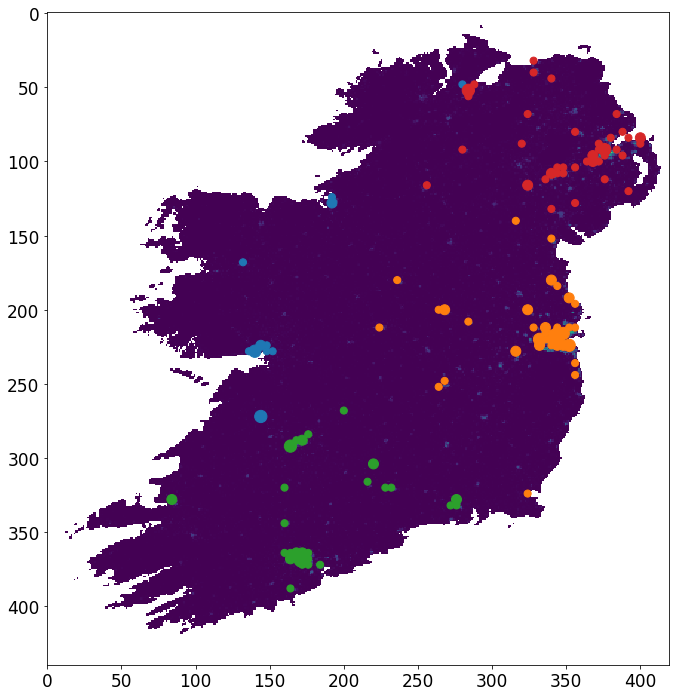

In [64]:
DF=pd.read_csv(r'O:\Desktop\WORLDMAP\IRELAND_REG.csv', index_col=0)
DF['4x']=4*DF['x']
DF['-4y']=4*DF['-y']

n_cases=29+5
s_cases=20+13
w_cases=10+5
e_cases=13+21
a_cases=47

N_DF=DF[DF['REG']=="N"]
x=np.random.choice(list(N_DF.index), n_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
N_DF=DF[DF['REG']=="S"]
x=np.random.choice(list(N_DF.index), s_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
N_DF=DF[DF['REG']=="W"]
x=np.random.choice(list(N_DF.index), w_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
N_DF=DF[DF['REG']=="E"]
x=np.random.choice(list(N_DF.index), e_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
x=np.random.choice(list(DF.index), a_cases, p=DF['T']/DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
x=np.random.choice(list(DF.index), 10000, p=DF['T']/DF['T'].sum())
for i in x:
    DF['E'].iloc[i]+=1
    
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow((df**0.5)**2)

ax.scatter(DF[DF['REG']=="W"]['4x'], DF[DF['REG']=="W"]['-4y'], s=DF[DF['REG']=="W"]['I']*50)
ax.scatter(DF[DF['REG']=="E"]['4x'], DF[DF['REG']=="E"]['-4y'], s=DF[DF['REG']=="E"]['I']*50)
ax.scatter(DF[DF['REG']=="S"]['4x'], DF[DF['REG']=="S"]['-4y'], s=DF[DF['REG']=="S"]['I']*50)
ax.scatter(DF[DF['REG']=="N"]['4x'], DF[DF['REG']=="N"]['-4y'], s=DF[DF['REG']=="N"]['I']*50)

In [66]:
#DF.to_csv(r'O:\Desktop\WORLDMAP\INITIAL_CONDS.csv', sep=',', index=True)

TOTAL: 4074762.8577740956 FROM ORIGINAL 6551319.200469393

MODEL: 
$$ E_{new}(i \rightarrow j) = \alpha \frac{\left(S_j + \theta Q_j\right) I_i}{r^2}$$
if r=0, then $$ E_{new}(i \rightarrow i) = \alpha_0{\left(S_i + \theta Q_i\right) I_i}$$

$$ I_{new} = \kappa E $$
$$ D_{new} = \beta \left(I+\varepsilon Q\right) $$
$$ Q_{new} = \gamma \left(I+\eta S\right) $$
$$ R_{new} = \sigma \left(I+\zeta Q\right) $$

might add an influx term later to simulate flights in etc.

In [247]:
def prochain(idf, alpha=0.0001, alpha_0=0.0002, theta=0, kappa=0.5, beta=0.005, eps=0, gamma=0, eta=0, sigma=0, zeta=0):
    """Given the current state and various probability, predicts the next state"""
    df=idf.copy()
    df1=idf.copy()
    
    df['E_new']=0
    df['D_new']=0
    df['Q_new']=0
    df['R_new']=0
    
    df['s_contrib_Q']=gamma*eta*df['S']
    df['q_contrib_D']=beta*eps*df['Q']
    df['q_contrib_R']=sigma*zeta*df['Q']
    df['i_contrib_D']=beta*df['I']
    df['i_contrib_Q']=gamma*df['I']
    df['i_contrib_R']=sigma*df['I']
    df['s_contrib_E']=0
    df['q_contrib_E']=0
    
    infected=df[df['I']>0]
    
    for i in infected.index.values: #for each infected
        #print(i)
        for j in range(df.shape[0]): #for each region
            if i==j: #i.e. i to i or j to j
                df['s_contrib_E'][j]=infected['s_contrib_E'][i]+alpha_0 * infected['I'][i] * infected['S'][i]
                df['q_contrib_E'][j]=infected['q_contrib_E'][i]+alpha_0 * infected['I'][i] * theta*infected['Q'][i]
            else: #i.e. i to j
                x=df['x'][i]-df['x'][j]
                y=df['-y'][i]-df['-y'][j]
                r_2=(abs(x)**2+abs(y)**2)
                df['s_contrib_E'][j]=df['s_contrib_E'][j]+infected['I'][i] * 1/r_2 * alpha * df['S'][j]
                df['q_contrib_E'][j]=df['q_contrib_E'][j]+infected['I'][i] * theta*df['Q'][j] * 1/r_2 * alpha
    
    df['s_contrib']=df['s_contrib_Q']+df['s_contrib_E']
    df['q_contrib']=df['q_contrib_D']+df['q_contrib_R']+df['q_contrib_E']
    df['i_contrib']=df['i_contrib_D']+df['i_contrib_Q']+df['i_contrib_R']
    
    df['s_contrib_Q'], df['s_contrib_E']=np.where(df['s_contrib']>df['S'], [df['S']*df['s_contrib_Q']/(df['s_contrib']), df['S']*df['s_contrib_E']/(df['s_contrib'])], [df['s_contrib_Q'], df['s_contrib_E']])
    df['q_contrib_D'], df['q_contrib_R'], df['q_contrib_E']=np.where(df['q_contrib']>df['Q'], [df['Q']*df['q_contrib_D']/df['q_contrib'], df['Q']*df['q_contrib_R']/df['q_contrib'], df['Q']*df['q_contrib_E']/df['q_contrib']], [df['q_contrib_D'], df['q_contrib_R'], df['q_contrib_E']])
    df['i_contrib_D'], df['i_contrib_R'], df['i_contrib_Q']=np.where(df['i_contrib']>df['I'], [df['I']*df['i_contrib_D']/df['i_contrib'], df['I']*df['i_contrib_R']/df['i_contrib'], df['I']*df['i_contrib_Q']/df['i_contrib']], [df['i_contrib_D'], df['i_contrib_R'], df['i_contrib_Q']])
    
    df['E_new']=df['E_new']+df['q_contrib_E']+df['s_contrib_E']
    df['D_new']=df['D_new']+df['q_contrib_D']+df['i_contrib_D']
    df['Q_new']=df['Q_new']+df['s_contrib_Q']+df['i_contrib_Q']
    df['R_new']=df['R_new']+df['q_contrib_R']+df['i_contrib_R']
    
    df1['I']=df1['I']+kappa*df['E']-df['i_contrib']
    df1['I']=np.where(df1['I']<0, 0, df1['I'])
    df1['E']=df['E']+df['E_new']
    df1['D']=df['D']+df['D_new']
    df1['Q']=df['Q']+df['Q_new']-df['q_contrib']
    df1['R']=df['R']+df['R_new']
    df1['S']=df['S']-df['s_contrib']
    
    
    return df1

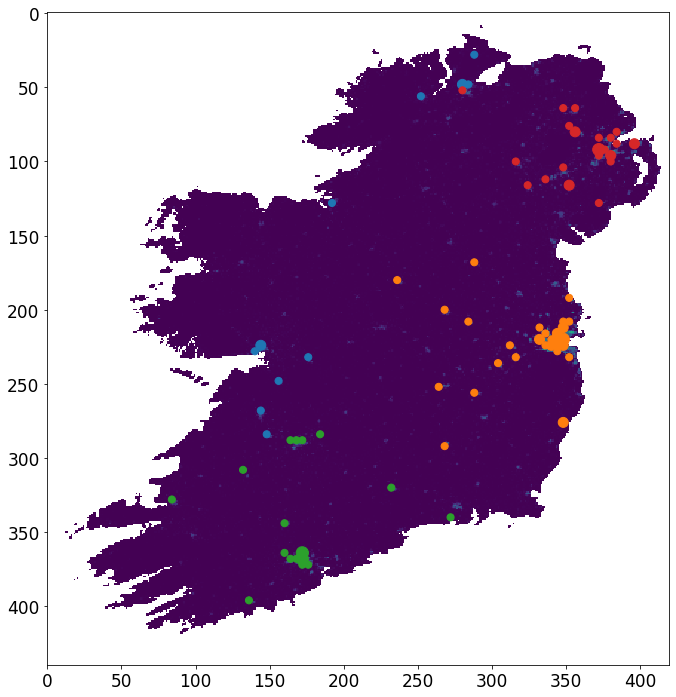

In [55]:
DF=pd.read_csv(r'O:\Desktop\WORLDMAP\IRELAND_REG.csv', index_col=0)
DF['4x']=4*DF['x']
DF['-4y']=4*DF['-y']

frac=4074762.8577740956/6551319.200469393

n_cases=int((29+5)*frac)
s_cases=int((20+13)*frac)
w_cases=int((10+5)*frac)
e_cases=int((13+21)*frac)
a_cases=int((47)*frac)

N_DF=DF[DF['REG']=="N"]
x=np.random.choice(list(N_DF.index), n_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
N_DF=DF[DF['REG']=="S"]
x=np.random.choice(list(N_DF.index), s_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
N_DF=DF[DF['REG']=="W"]
x=np.random.choice(list(N_DF.index), w_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
N_DF=DF[DF['REG']=="E"]
x=np.random.choice(list(N_DF.index), e_cases, p=N_DF['T']/N_DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
x=np.random.choice(list(DF.index), a_cases, p=DF['T']/DF['T'].sum())
for i in x:
    DF['I'].iloc[i]+=1
    
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow((df**0.5)**2)

ax.scatter(DF[DF['REG']=="W"]['4x'], DF[DF['REG']=="W"]['-4y'], s=DF[DF['REG']=="W"]['I']*50)
ax.scatter(DF[DF['REG']=="E"]['4x'], DF[DF['REG']=="E"]['-4y'], s=DF[DF['REG']=="E"]['I']*50)
ax.scatter(DF[DF['REG']=="S"]['4x'], DF[DF['REG']=="S"]['-4y'], s=DF[DF['REG']=="S"]['I']*50)
ax.scatter(DF[DF['REG']=="N"]['4x'], DF[DF['REG']=="N"]['-4y'], s=DF[DF['REG']=="N"]['I']*50)

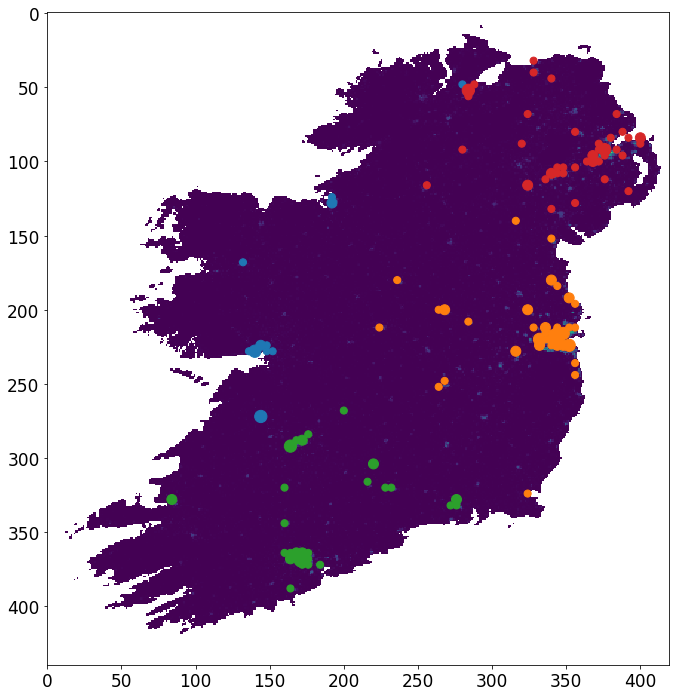

In [67]:
IC=pd.read_csv(r'O:\Desktop\WORLDMAP\INITIAL_CONDS.csv', index_col=0)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow((df**0.5)**2)

ax.scatter(IC[IC['REG']=="W"]['4x'], IC[IC['REG']=="W"]['-4y'], s=IC[IC['REG']=="W"]['I']*50)
ax.scatter(IC[IC['REG']=="E"]['4x'], IC[IC['REG']=="E"]['-4y'], s=IC[IC['REG']=="E"]['I']*50)
ax.scatter(IC[IC['REG']=="S"]['4x'], IC[IC['REG']=="S"]['-4y'], s=IC[IC['REG']=="S"]['I']*50)
ax.scatter(IC[IC['REG']=="N"]['4x'], IC[IC['REG']=="N"]['-4y'], s=IC[IC['REG']=="N"]['I']*50)

In [110]:
data=[IC]
mx=IC['T'].max()
for i in range(11):
    print(i)
    data.append(prochain(data[-1], alpha=50/mx, alpha_0=100/mx, kappa=0.04/14, beta=0.02/14, sigma=0.88/14))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value i

In [240]:
mx=IC['T'].max()
for i in range(2):
    print(i)
    data.append(prochain(data[-1], alpha=50/mx, alpha_0=100/mx, kappa=0.04/14, beta=0.02/14, sigma=0.88/14))

0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value i

1


OverflowError: int too big to convert

In [241]:
inc, prev_inc, perc_inc=0,0,0
incs, perc_incs, infs=[], [], []
for i in range(len(data)):
    print("DAY: {}".format(i+1))
    if i>1:
        inc=data[i]['I'].sum()-data[i-1]['I'].sum()
        perc_inc=100*(inc-prev_inc)/prev_inc

    else:
        if (i==0):
            inc=0
        else:
            inc=data[i]['I'].sum()-data[i-1]['I'].sum()
            perc_inc=0
    print(inc)
    print(perc_inc)
    perc_incs.append(perc_inc)
    incs.append(inc)
    infs.append(data[i]['I'].sum())
    
    prev_inc=inc
    print("")

DAY: 1
0
0

DAY: 2
18.092857142857156
0

DAY: 3
37.74688775510202
108.6286729456881

DAY: 4
55.374587827988364
46.699744326613285

DAY: 5
79.08336432476051
42.81526495586636

DAY: 6
113.0051480467402
42.89370338707124

DAY: 7
162.4348171008782
43.74107720622899

DAY: 8
234.82686457296472
44.56682918362773

DAY: 9
340.5108518504169
45.00506680512882

DAY: 10
492.8065828028905
44.72566149503383

DAY: 11
707.257588194133
43.516262337960114

DAY: 12
997.8424575245099
41.08614374464869

DAY: 13
1369.3268709693639
37.228763984091074

DAY: 14
1804.758714978475
31.7989702269454

DAY: 15
2259.081369015572
25.173595243867023

DAY: 16
2673.7375607217164
18.35507996273888

DAY: 17
3017.7060914924623
12.864708033570027

DAY: 18
3296.1096052965186
9.225666959049901

DAY: 19
3522.0951881645997
6.85613070951721

DAY: 20
3701.26759659687
5.08709727761898

DAY: 21
3068.4345499332267
-17.09773827878594

DAY: 22
2521.0027345984345
-17.840752553992232

DAY: 23
1625.485108132627
-35.52227905887031

DAY: 24


Text(0, 0.5, 'Total Infected (major population centres)')

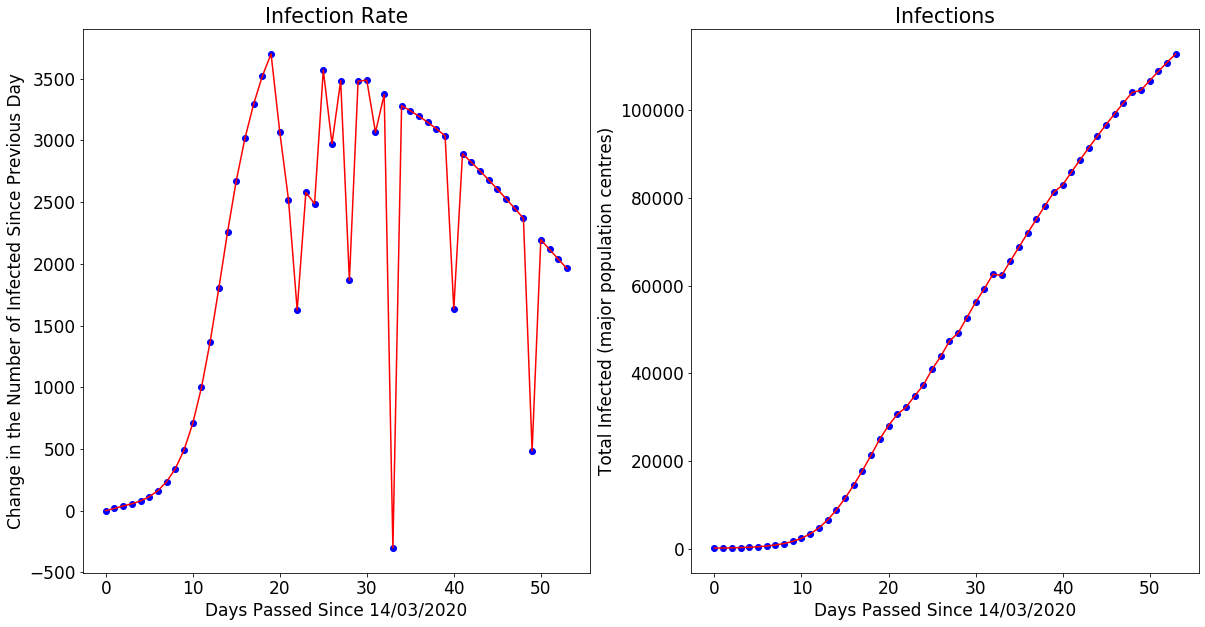

In [242]:
fig, ax=plt.subplots(1,2, figsize=(20, 10))

ax[0].set_title('Infection Rate')
ax[0].plot(range(len(data)), incs ,'bo')
ax[0].plot(range(len(data)), incs ,'r-')
ax[0].set_xlabel("Days Passed Since 14/03/2020")
ax[0].set_ylabel("Change in the Number of Infected Since Previous Day")

ax[1].set_title('Infections')
ax[1].plot(range(len(data)), infs ,'bo')
ax[1].plot(range(len(data)), infs ,'r-')
ax[1].set_xlabel("Days Passed Since 14/03/2020")
ax[1].set_ylabel("Total Infected (major population centres)")

In [243]:
mdf=pd.DataFrame(data)
mdf.to_csv(r'O:\Desktop\WORLDMAP\INFECT_PREDICTION_DF.csv', sep=',', index=True)

In [244]:
mdf=pd.read_csv(r'O:\Desktop\WORLDMAP\INFECT_PREDICTION_DF.csv', sep=',', index_col=0)
mdf=mdf.values
mdf[0][0].split('\n')
#etc... not bothered

['      x   -y            T  I  D            S  Q  R   E REG   4x  -4y',
 '0    72    7  2649.716228  0  0  2649.716228  0  0   6   W  288   28',
 '1    82    8  4843.815504  1  0  4843.815504  0  0  15   N  328   32',
 '2    83    8  2591.291308  0  0  2591.291308  0  0   6   N  332   32',
 '3    89    8  4779.459911  0  0  4779.459911  0  0  14   N  356   32',
 '4    68    9  5141.550040  0  0  5141.550040  0  0  11   W  272   36',
 '..   ..  ...          ... .. ..          ... .. ..  ..  ..  ...  ...',
 '369  37   96  4596.917536  0  0  4596.917536  0  0  10   S  148  384',
 '370  38   96  3112.219993  0  0  3112.219993  0  0   6   S  152  384',
 '371  41   97  4503.274241  1  0  4503.274241  0  0  16   S  164  388',
 '372  34   99  4352.471299  0  0  4352.471299  0  0  10   S  136  396',
 '373  27  101  3177.104601  0  0  3177.104601  0  0   5   S  108  404',
 '',
 '[374 rows x 12 columns]']

In [245]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
fig = plt.figure(figsize=(10,10))
plt.scatter([], [])

var='I'

def animate(i):
    p=plt.imshow((df**0.5)**2, cmap="copper")
    p=plt.title("Day {0} Infected: {1:.0f} ({4:.2f}% of total)\nInfection Rate: \n{2:.2f} ({3:.2f}% change)".format(i+1, data[i][var].sum(), incs[i], perc_incs[i],100*data[i][var].sum()/4074762.8577740956))
    p=plt.axis('off')
    p1=plt.scatter(data[i][data[i]['REG']=="W"]['4x'],data[i][data[i]['REG']=="W"]['-4y'],s=data[i][data[i]['REG']=="W"][var]/4, c='red')
    p2=plt.scatter(data[i][data[i]['REG']=="S"]['4x'],data[i][data[i]['REG']=="S"]['-4y'],s=data[i][data[i]['REG']=="S"][var]/4, c='magenta')
    p3=plt.scatter(data[i][data[i]['REG']=="E"]['4x'],data[i][data[i]['REG']=="E"]['-4y'],s=data[i][data[i]['REG']=="E"][var]/4, c='orange')
    p4=plt.scatter(data[i][data[i]['REG']=="N"]['4x'],data[i][data[i]['REG']=="N"]['-4y'],s=data[i][data[i]['REG']=="N"][var]/4, c='purple')
    p=plt.legend((p1, p2, p3, p4),
           ('WEST: {0:.0f}'.format(data[i][data[i]['REG']=="W"][var].sum()), 'SOUTH: {0:.0f}'.format(data[i][data[i]['REG']=="S"][var].sum()), 'EAST: {0:.0f}'.format(data[i][data[i]['REG']=="E"][var].sum()), 'NORTH: {0:.0f}'.format(data[i][data[i]['REG']=="N"][var].sum())),
                fontsize=16)
    
anim = animation.FuncAnimation(fig, animate, frames=len(data), repeat=True, interval=700)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

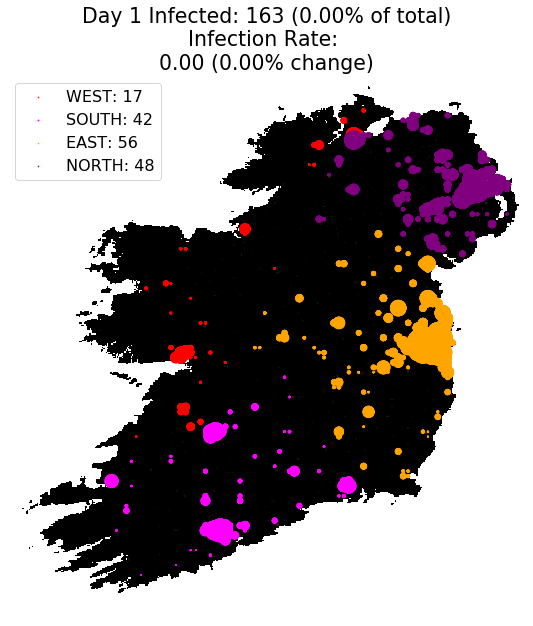

In [246]:
fig2 = plt.figure(figsize=(10,10))
plt.scatter([], [])

anim = animation.FuncAnimation(fig2, animate, frames=len(data), repeat=True, interval=700)
anim.save('prediction_14_03_20.mp4')

Initial conditions from RTE & HSE etc.

https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30144-4/fulltext

"The incubation period was assumed to be Erlang distributed with mean 5·2 days"

"the time-varying basic reproduction number (Rt), defined here as the mean number of secondary cases generated by a typical infectious individual on each day in a full susceptible population. "
"We estimated that Rt varied during January, 2020, with median values ranging from 1·6 to 2·6 between Jan 1, 2020"